<center>
<h1 style="color:red; font-size:70px;"> Esercitazione 5</h1>

In [5]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


from hyperopt import hp
from tensorflow import keras
from hyperopt.pyll.stochastic import sample
from tensorflow.keras import layers, activations

<h1 style="color: blue; font-size:50px;"> Esercizio 1 - Ottimizzazione Bayesana</h1>

L’ottimizzazione bayesiana è una tecnica di ottimizzazione usata per trovare il massimo (o minimo) di una funzione obiettivo costosa da valutare e senza una forma analitica nota, cioè una black-box function. Per svolgere questo esercizio verrà utilizzata la libreria **Hyperopt**, pensata per l'ottimizzazione automatica di funzioni.

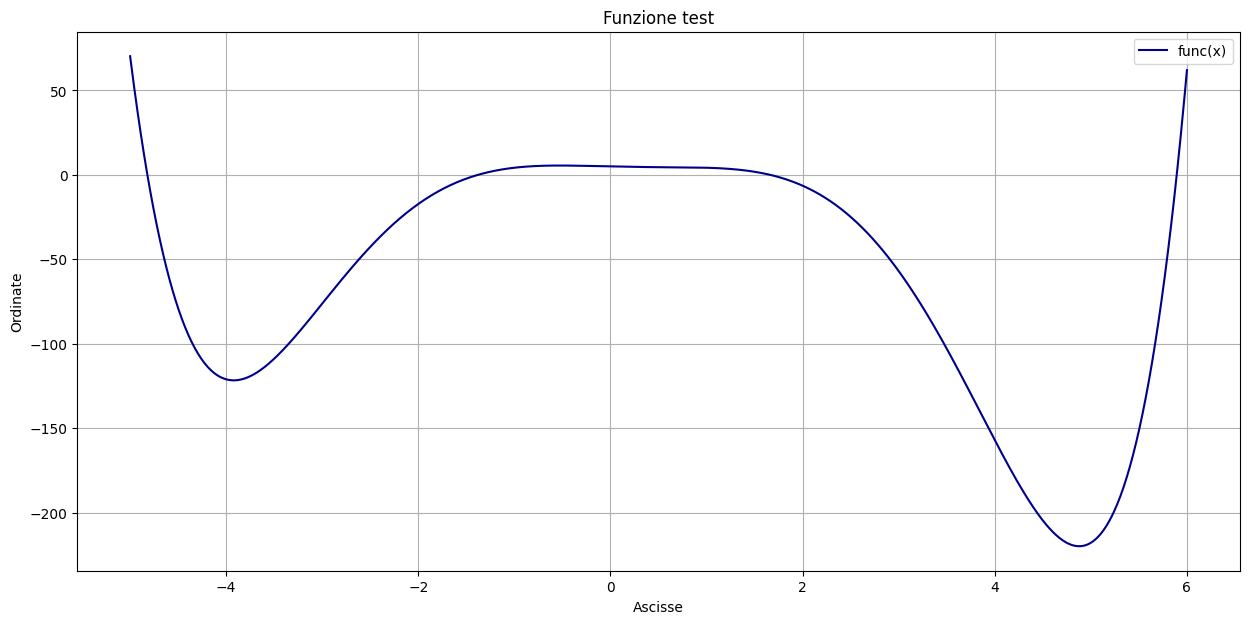

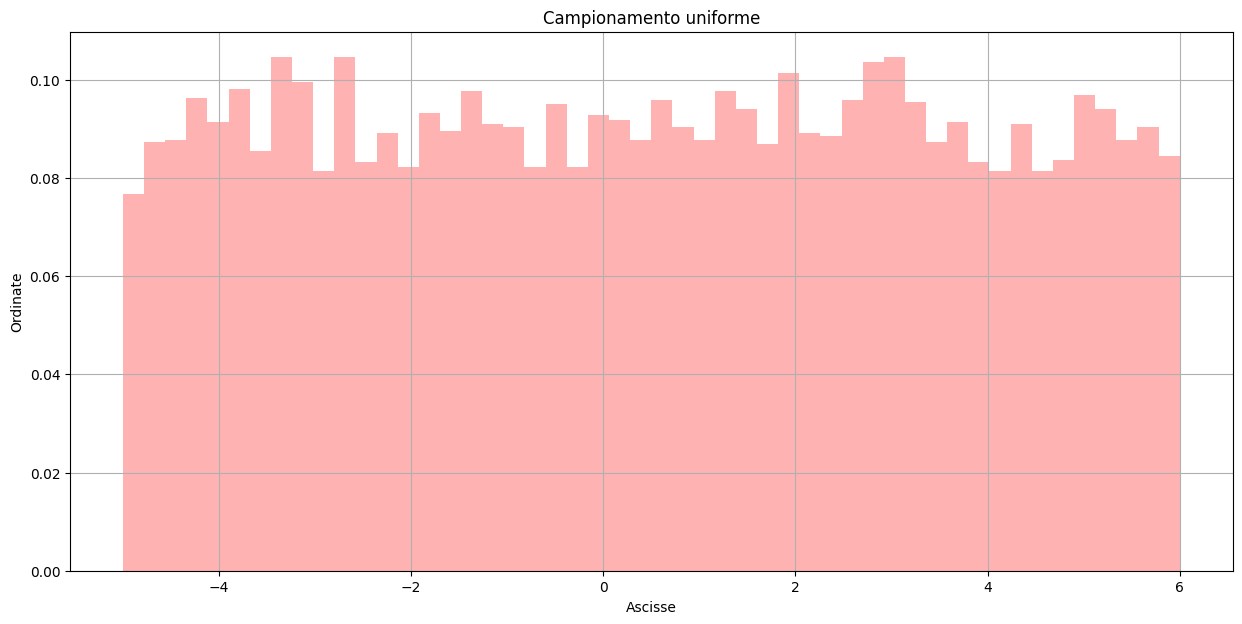

In [11]:
# Definisco funzione polinomiale f(x) = 0.05 * (x^6 - 2x^5 - 28x^4 + 28x^3 + 12x^2 - 26x + 100)
# Valuto tale funzione su un intervallo di punti equispaziati fra [-5, 6]
def func(x):
    p = np.poly1d([1, -2, -28, 28, 12, -26, 100])
    return p(x) * 0.05

def plotF(x):
    # Funzione per plottare target
    fig = plt.figure(figsize = (15, 7))
    plt.plot(x, func(x), color = 'darkblue', label = "func(x)")
    plt.title("Funzione test")
    plt.ylabel("Ordinate")
    plt.xlabel("Ascisse")
    plt.legend(loc = 'best')
    plt.grid(True)
    plt.show()

def plotHist(x, nbins):
    # Funzione per plottare campionamento uniforme
    fig = plt.figure(figsize = (15, 7))
    plt.hist(x, bins = nbins, range = (min(x), max(x)), density = True, color = (1, 0, 0, 0.3))
    plt.title("Campionamento uniforme")
    plt.ylabel("Ordinate")
    plt.xlabel("Ascisse")
    plt.grid(True)
    plt.show()

x = np.linspace(-5, 6, 1000)
plotF(x)

# Definiamo ora un dominio di ricerca uniforme utilizzando hyperopt
# Facciamo sampling di questo dominio e facciamo un istogramma
space = hp.uniform('x', -5, 6)
plotHist([sample(space) for _ in range(10000)], 50)
